In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [2]:
filename = "titanic_numerical_clean._With_Headers.csv"

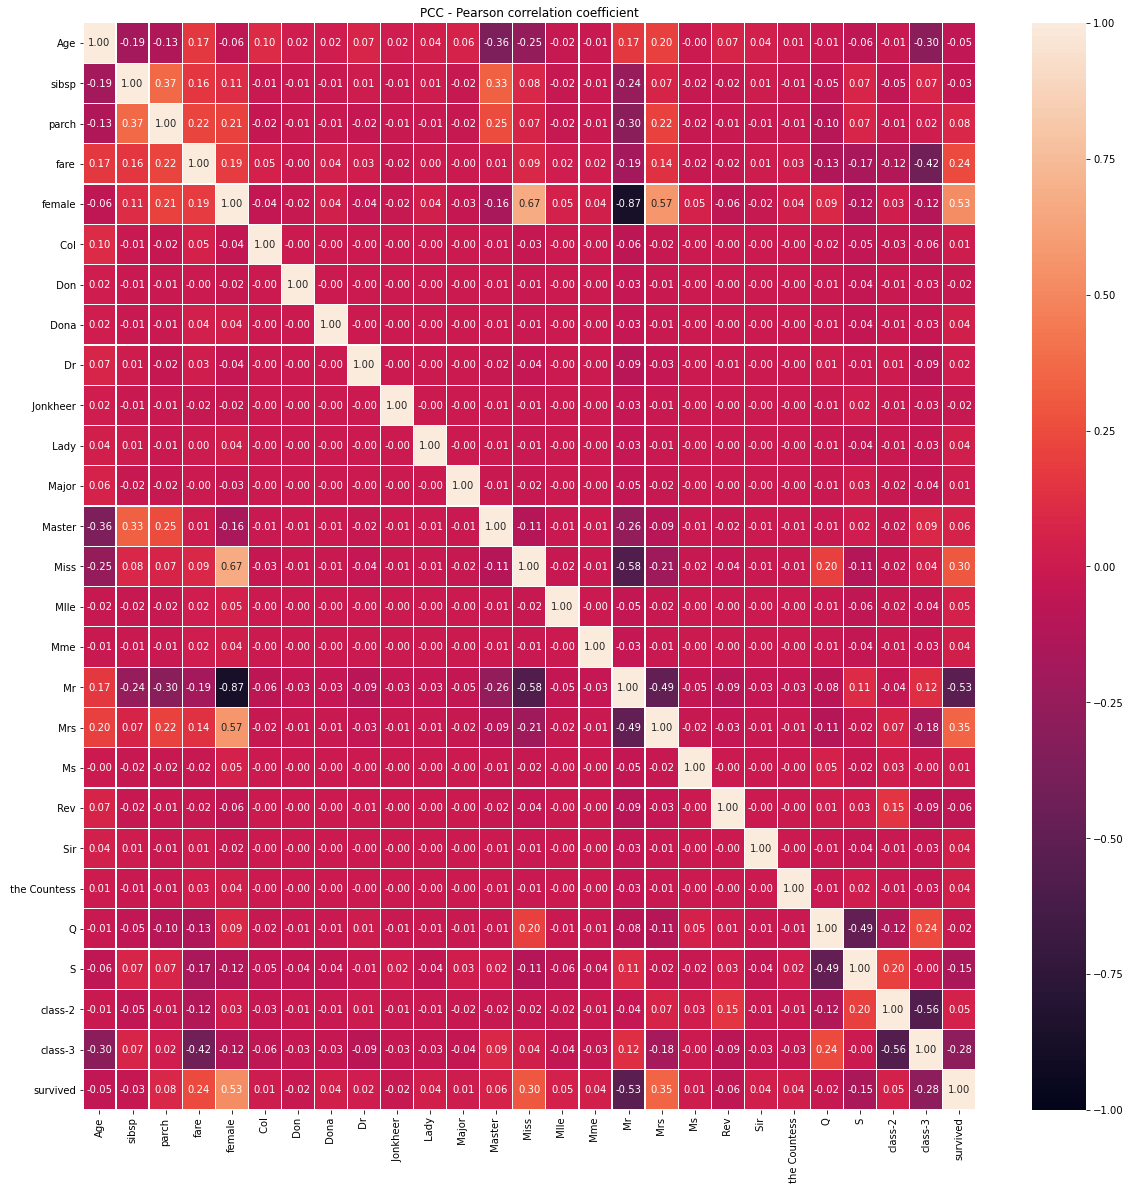

In [3]:
df = pd.read_csv(filename, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], sep=",", header=0)
train = df;

columns = df.columns.tolist()
nColumns = len(columns)
result = pd.DataFrame(np.zeros((nColumns, nColumns)), columns=columns)

# Apply Pearson correlation on each pair of features.
for col_a in range(nColumns):
    for col_b in range(nColumns):
        result.iloc[[col_a], [col_b]] = pearsonr(train.loc[:, columns[col_a]], train.loc[:,  columns[col_b]])[0]
        
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(result, yticklabels=columns, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.2)
ax.set_title('PCC - Pearson correlation coefficient')
plt.show()

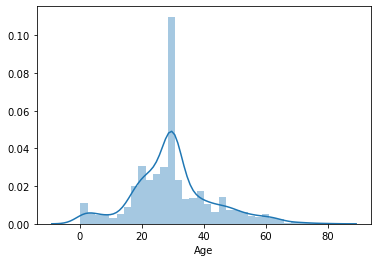

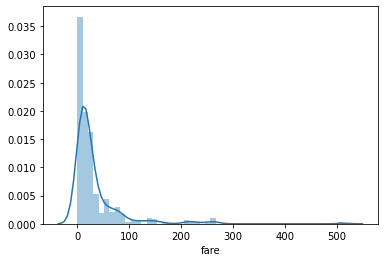

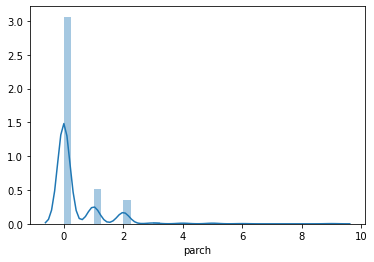

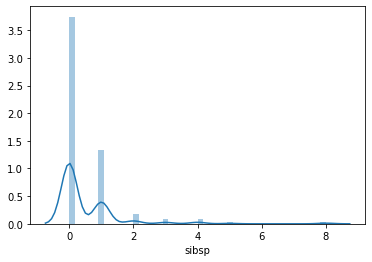

In [4]:
continuous_numeric_features = ['Age', 'fare', 'parch', 'sibsp']
for feature in continuous_numeric_features:
    sns.distplot(train[feature])
    plt.show()

In [5]:
train = pd.read_csv(filename, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], sep=",", header=0)
labels = df['survived']
# Split data in train and validation (80% ~ 20%)¶
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [6]:
X = df.drop('survived', axis='columns')
labels = df['survived']
trainX, testX, trainY, testY = train_test_split(X, labels, test_size=0.33)

print(len(trainX), 'training records and', len(testX), 'testing records')

def trainAndPredict(model):
    model.fit(trainX, trainY)
    predictions = model.predict(testX)
    mismatch = 0
    for estimate, real in zip(predictions, testY):
        if estimate != real:
            mismatch += 1
    return mismatch

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

modelNames = ["Gaussian Naive Bayes", "Multinomial Naive Bayes", "Bernoulli Naive Bayes"]
predictionErrors = [trainAndPredict(gnb), trainAndPredict(mnb), trainAndPredict(bnb)]

for i in range(3):
    print(f"Out of {len(testX)} records, the {modelNames[i]} classifier has {predictionErrors[i]} incorrect predictions")

877 training records and 432 testing records
Out of 432 records, the Gaussian Naive Bayes classifier has 116 incorrect predictions
Out of 432 records, the Multinomial Naive Bayes classifier has 124 incorrect predictions
Out of 432 records, the Bernoulli Naive Bayes classifier has 90 incorrect predictions


In [7]:
def cross_validate(estimator, train, validation):
    X_train = train[0]
    Y_train = train[1]
    X_val = validation[0]
    Y_val = validation[1]
    train_predictions = classifier.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, Y_train)
    train_recall = recall_score(train_predictions, Y_train)
    train_precision = precision_score(train_predictions, Y_train)

    val_predictions = classifier.predict(X_val)
    val_accuracy = accuracy_score(val_predictions, Y_val)
    val_recall = recall_score(val_predictions, Y_val)
    val_precision = precision_score(val_predictions, Y_val)

    print('Model metrics')
    print('Accuracy  Train: %.2f, Validation: %.2f' % (train_accuracy, val_accuracy))
    print('Recall    Train: %.2f, Validation: %.2f' % (train_recall, val_recall))
    print('Precision Train: %.2f, Validation: %.2f' % (train_precision, val_precision))
    
# Split train data into two parts: 70% training, 30% testing
X_train1, X_train2, Y_train1, Y_train2 = train_test_split(X_train, Y_train, test_size=0.3, random_state=12)

classifier = GaussianNB()
classifier.fit(X_train2, Y_train2)
print('Metrics with the remaining 70% of train data')
cross_validate(classifier, (X_train, Y_train), (X_val, Y_val))

Metrics with the remaining 70% of train data
Model metrics
Accuracy  Train: 0.41, Validation: 0.44
Recall    Train: 0.39, Validation: 0.42
Precision Train: 0.99, Validation: 0.98


In [8]:
classifier.partial_fit(X_train1, Y_train1)
print('Updated Metrics with remaining data')
cross_validate(classifier, (X_train, Y_train), (X_val, Y_val))

Updated Metrics with remaining data
Model metrics
Accuracy  Train: 0.79, Validation: 0.83
Recall    Train: 0.71, Validation: 0.82
Precision Train: 0.75, Validation: 0.75


In [9]:
print('Probability of each class')
print('Survive = 0: %.2f' % classifier.class_prior_[0])
print('Survive = 1: %.2f' % classifier.class_prior_[1])

Probability of each class
Survive = 0: 0.62
Survive = 1: 0.38


In [10]:
df = pd.read_csv(filename, usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], sep=",")
df.columns = ['PassengerId','','','','','','','','','','','','','','','','','','','','','','','','','']
train, test = train_test_split(df, test_size=0.2)
test_predictions = classifier.predict(test)
test_ids = test['PassengerId'].values

submission = pd.DataFrame({'PassengerId': test_ids})
submission['Survived'] = test_predictions.astype('int')
submission.to_csv('submission.csv', index=False)
submission.head(10)

,PassengerId,Survived
0,1052,1
1,863,1
2,23,1
3,525,0
4,1031,1
5,1270,1
6,827,1
7,956,1
8,918,1
9,90,0


## Learning Curve

<module 'matplotlib.pyplot' from 'c:\\users\\ilcondor\\opencv\\lib\\site-packages\\matplotlib\\pyplot.py'>

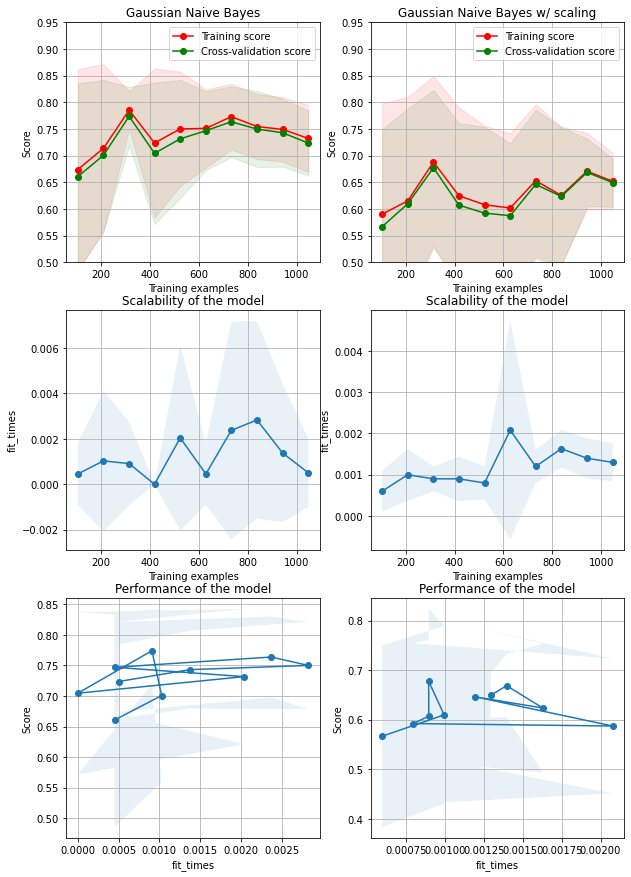

In [40]:
import sklearn as skl
from plotter import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

X = pd.read_csv(filename, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], sep=",", header=0)
y = X.pop('survived')

X_np_array = np.array(X)
y_np_array = np.array(y)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

 # source : https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-download-auto-examples-model-selection-plot-learning-curve-py
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
title = 'Gaussian Naive Bayes'
title_scaled = 'Gaussian Naive Bayes w/ scaling'
#estimator = BernoulliNB()
#title = 'Bernoulli Naive Bayes'
#title_scaled = 'Bernoulli Naive Bayes w/ scaling'

scaler = skl.preprocessing.StandardScaler().fit(X_np_array)
X_scaled_data = scaler.transform(X_np_array)

plot_learning_curve(estimator, title, X_np_array, y_np_array, axes=axes[:, 0], ylim=(0.5,0.95), 
                    cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plot_learning_curve(estimator, title_scaled, X_scaled_data, y_np_array, axes=axes[:, 1], ylim=(0.5,0.95), 
                    cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))